# Telco's Customer Churn Analysis
### Created by Ferry Hermawan Kristianto

## Business Problem Understanding


**Context**  
Telco merupakan perusahaan yang bergerak di bidang layanan internet. Perusahaan ini ingin mengatasi berhentinya pelanggan dalam menggunakan layanan perusahaan ini. Maka dari itu perusahaan ingin memprediksi customer yang mana saja yang akan berhenti menggunakan layanan internet perusahaan ini sehingga perusahaan ini dapat mengambil tindakan untuk mencega customer tersebut berhenti berlangganan. Informasi yang dipunyai perusahaan tentang customer adalah lamanya customer sudah berlangganan, internet service yang digunakan, kontrak berapa lama, apakah menggunakan paperless billing dan biaya perbulan tiap customer.

Target :

0 : Customer yang tidak berhenti berlangganan

1 : Customer yang berhenti berlangganan

**Problem Statement :**

Pada website Harvard Business Review dikatakan bahwa mendapatkan pelanggan baru bisa hingga 25 kali lebih mahal dibandingkan mempertahankan pelanggan yang ada. Selain itu pada penelitian oleh Frederick Reichheld dari Bain & company menunjukkan peningkatan tingkat retensi pelanggan sebesar 5% meningkatkan keuntungan sebesar 25% hingga 95%. Oleh karena itu, perusahaan tidak ingin customer yang sudah didapatkan berhenti berlangganan.

Pertimbangan lainnya adalah membutuhkan biaya yang besar dan tidak efektif apabila perusahaan terapkan perlakuan khusus terhadap semua customer untuk menurunkan customer yang berhenti berlangganan. Hal ini tidak efektif karena pelanggan yang harusanya tanpa diberikan perlakuan apapun akan tetap berlangganan tetapi perusahaan berikan perlakuan khusus dan menjadi sia sia.

Maka perusahaan ini ingin mengetahui apakah suatu customer akan berhenti berlangganan atau tidak sehingga perusahaan bisa mencegah berhentinya customer dalam berlangganan dan dapat mencegah berhentinya customer dalam menggunakan layanan dengan efektif dan biaya yang minim.


**Goals :**

Maka berdasarkan permasalahan tersebut, perusahaan ingin memiliki kemampuan untuk memprediksi kemungkinan seorang customer akan berhenti berlangganan atau tidak, sehingga bisa memfokuskan membangun strategi untuk mencegah customer yang hanya diperkirakan akan berhenti berlangganan.

Selain itu perusahaan juga ingin mengetahui faktor apa saja yang dapat memungkinkan pelanggan untuk berhenti agar dapat membuat strategi yang lebih baik dalam mempertahankan customer.

**Analytic Approach :**

Jadi yang akan kita lakukan adalah menganalisis data untuk menemukan pola yang membedakan customer yang kiranya akan berhenti berlangganan.

Kemudian kita akan membangun model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi seorang customer akan/ingin berhenti berlangganan dari perusahaan tersebut atau tidak.

**Metric Evaluation**

Dalam kasus ini perusahaan ingin mencegah customer yang memang benar benar akan berhenti berlangganan dan mencegah sebanyak banyaknya customer yang akan berhenti berlangganan. Maka dari itu kita perlu meminimalisir false negative (customer yang aslinya akan berhenti berlangganan tetapi diprediksi akan tetap berlangganan) dan false positive (customer yang aslinya tidak akan berhenti berlangganan tetapi diprediski akan berhenti berlangganan). Maka dari itu nilai recall dan precision sama sama penting. Maka kita gunakan F1 Score sebagai metric untuk evaluasi model machine learning. Rumus dari F1 Score adalah sebagai berikut:

F1 Score = 2 * Precision * Recall / ( Precision + recall )

Dengan rumus precision dan recall sebagai berikut:

Recall = TP / (TP + FN)

Precision = TP / (TP + FP)

## Data Understanding

### Attribute Information

| Attribute | Description |
| --- | --- |
| Dependents | Apakah customer mempunyai tanggungan seperti anak  |
| Tenure | Lama customer sudah berlangganan dalam bulan |
| OnlineSecurity| Apakah customer mempunyai Online Security |
| OnlineBackup | Apakah customer mempunyai Online Backup |
| InternetService | Apakah customer berlangganan Internet Service |
| DeviceProtection | Apakah customer mempunyai DeviceProtection |
| TechSupport | Apakah customer mempunyai Tech Support |
| Contract | Tipe contract |
| PaperlessBilling | Bills dalam bentuk digital |
| MonthlyCharges | Biaya penggunaan service yang dibayarkan tiap bulan |
| Churn | Apakah Customer berhenti berlangganan |


Kita import berbagai library yang dibutuhkan

In [112]:
# Library
import numpy as np
import pandas as pd
import pickle

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import plotly.express as px
from IPython.display import display

# Feature Engineering
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,PolynomialFeatures,StandardScaler

# Model Selection
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score,classification_report,roc_auc_score,confusion_matrix,ConfusionMatrixDisplay, precision_recall_curve,roc_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.feature_selection import RFE,SequentialFeatureSelector
from sklearn.base import BaseEstimator, TransformerMixin
from category_encoders.ordinal import OrdinalEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.inspection import PartialDependenceDisplay

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import NearMiss, CondensedNearestNeighbour, NeighbourhoodCleaningRule

# Ignore Warning
import warnings
warnings.filterwarnings('ignore')

# Set max columns
pd.set_option('display.max_columns', None)

Kita load dataset yang dibutuhkan

In [113]:
# Load Dataset
df  = pd.read_csv('data_telco_customer_churn.csv', sep=',')
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


Kita cek tipe data dan jumlah value setiap kolom

In [114]:
# Count and Datatype for each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


Setelah kita cek tipe data dari setiap kolom sudah benar, selanjutnya kita akan data cleaning.

## Data Cleaning

### Missing Value

Hal pertama yang akan kita lihat adalah apakah ada missing value pada dataset.

In [115]:
df.isna().sum()

Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

Dapat dilihat bahwa dataset sudah tidak memiliki missing value berupa Nan value. Setelah itu kita cek data kategorik terlebih dahulu dalam dataframe customer.

### Duplicate Row

In [116]:
df[df.duplicated]

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
624,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,19.65,No
701,No,41,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.65,No
786,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,69.65,Yes
951,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,20.15,Yes
1266,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,19.65,No
...,...,...,...,...,...,...,...,...,...,...,...
4759,No,4,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,20.05,No
4786,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,20.35,No
4788,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,70.10,Yes
4866,No,1,No,No,DSL,No,No,Month-to-month,Yes,55.00,Yes


Karena setiap baris pada data diasumsikan satu customer yang berbeda beda maka hal ini dibiarkan

### Categoric

In [117]:
df[df['InternetService'] == 'No']['MonthlyCharges'].describe()

count    1052.000000
mean       21.098051
std         2.178246
min        18.800000
25%        19.700000
50%        20.150000
75%        20.900000
max        26.900000
Name: MonthlyCharges, dtype: float64

In [118]:
df[df['InternetService'] == 'Fiber optic']['MonthlyCharges'].describe()

count    2172.000000
mean       91.398688
std        12.708153
min        67.750000
25%        80.537500
50%        91.625000
75%       101.112500
max       118.650000
Name: MonthlyCharges, dtype: float64

In [119]:
df[df['InternetService'] == 'DSL']['MonthlyCharges'].describe()

count    1706.000000
mean       58.124414
std        15.995055
min        23.450000
25%        47.850000
50%        56.075000
75%        69.700000
max        93.250000
Name: MonthlyCharges, dtype: float64

In [120]:
df.describe()

,tenure,MonthlyCharges
count,4930.000000,4930.000000
mean,32.401217,64.883032
std,24.501193,29.923960
min,0.000000,18.800000
25%,9.000000,37.050000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.650000


Pertama kita akan cek unique value untuk setiap data kategorik

In [121]:
categoric = df.select_dtypes('object')
listItem = []
for col in categoric.columns :
    unique_value = ', '.join(categoric[col].unique())
    listItem.append( [col, unique_value])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Unique Value'],
                     data=listItem)
tabel1Desc

,Column Name,Unique Value
0,Dependents,"Yes, No"
1,OnlineSecurity,"No, Yes, No internet service"
2,OnlineBackup,"No, Yes, No internet service"
3,InternetService,"DSL, Fiber optic, No"
4,DeviceProtection,"Yes, No internet service, No"
5,TechSupport,"Yes, No, No internet service"
6,Contract,"Month-to-month, Two year, One year"
7,PaperlessBilling,"Yes, No"
8,Churn,"Yes, No"


Dari data diatas kita mengetahui:
- Ketika sesorang tidak berlangganan Internet Service maka otomatis tidak mempunyai Online Security, Online Backup, Device Protection, dan Tech Support
- Kontrak terdiri dari perbulan, per 1 tahun dan per 2 tahun
- Internet Service memiliki 2 tipe yaitu DSL dan Fiber Optic

Dapat dilihat semua unique value dari setiap kolom valid dan tidak ada kesalahan seperti typo atau missing value yang dituliskan dalam bentuk string seperti "?"

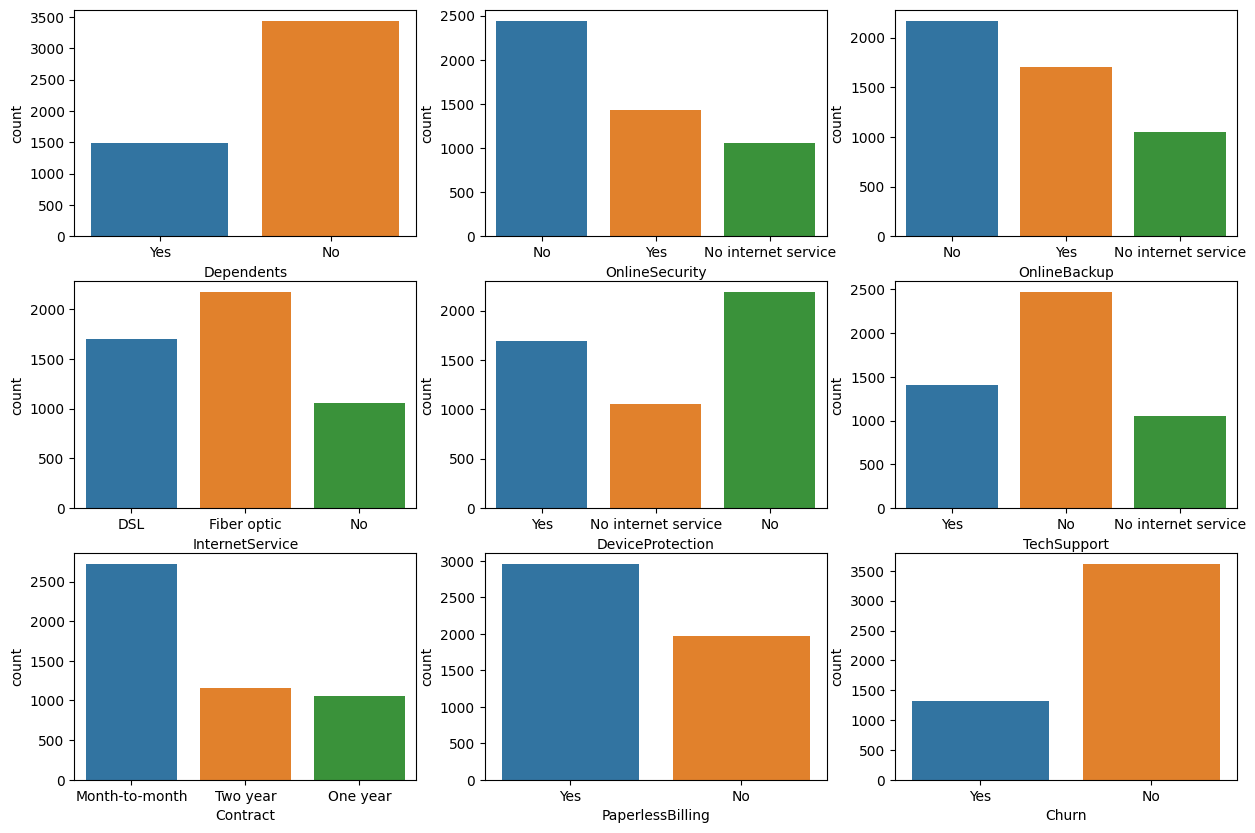

In [122]:
count = 0
plt.figure(figsize=(15,10))
for kolom in categoric:
    count += 1
    plt.subplot(3,3,count)
    sns.countplot(data=categoric, x = kolom)
plt.show()

Dari data diatas dapat diketahui:
- Customer lebih banyak yang tidak memiliki tanggungan
- Customer yang berlangganan internet service kebanyakan tidak memiliki Online Security, Online Backup, Device Protection dan Tech Support.
- Mayoritas Customer berlangganan Internet Service dan paling banyak berupa Fiber Optic
- Mayoritas Customer melakukan kontrak tiap bulan dan memilih Paperless Billing.
- Untuk proporsi yang sudah berhenti berlangganan disini lebih sedikit dibandingkan yang tetap berlangganan

### Numeric

In [123]:
numeric = df.select_dtypes('number')
numeric.describe()

,tenure,MonthlyCharges
count,4930.000000,4930.000000
mean,32.401217,64.883032
std,24.501193,29.923960
min,0.000000,18.800000
25%,9.000000,37.050000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.650000


Berdasarkan data diatas, mean masing masing kolom sudah mendekati median untuk nilainya tetapi untuk kolom tenure memiliki jarak nilai nilai minimum ke nilai Q1 yang cukup sedikit yang menandakan tidak terdistribusi normal. Untuk kolom Monthly Charges, nilai jarak antara nilai minimum dengan Q1, Q2 , Q3 dan nilai maksimum yang tidak konsistet menandakan tidak terdistribusi normal. Selain itu dilihat dari standar deviasi juga cukup besar dari kedua kolom. Maka dari itu kita cek distribusi dari kedua kolom tersebut dengan visualisasi histogram

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

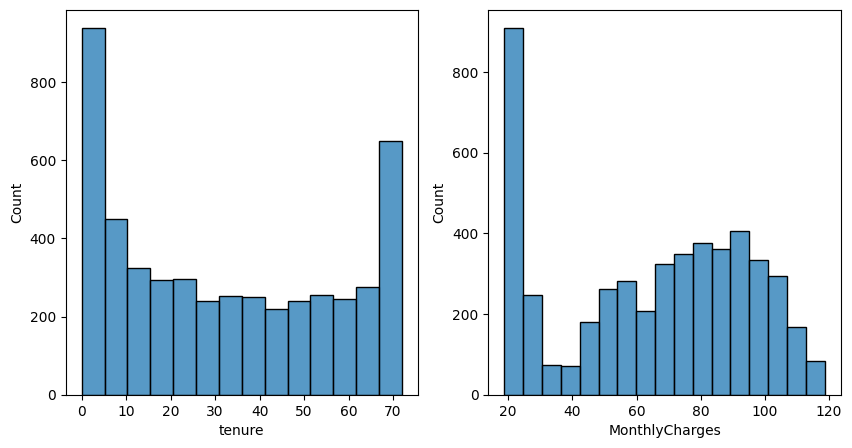

In [124]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df['tenure'])
plt.subplot(1,2,2)
sns.histplot(df['MonthlyCharges'])

Dapat dilihat bahwa kedua kolom tersebut tidak terdistribusi normal. Kolom tenure cendrung ke uniformed distribution tetapi memiliki frekuensi sangat tinggi di nilai sekitar 0 - 5 dan di sekitar nilai 70. Pada kolom Monthly Charge cendrung left skewed distribution tetapi di nilai sekitar angka 20 memiliki frekuensi yang sangat tinggi. Setelah itu kita cek apakah ada outlier dan juga kita cek korelasi antar monthly charges dengan tenure menggunakan scatterplot.

Text(0, 0.5, 'MonthlyCharges')

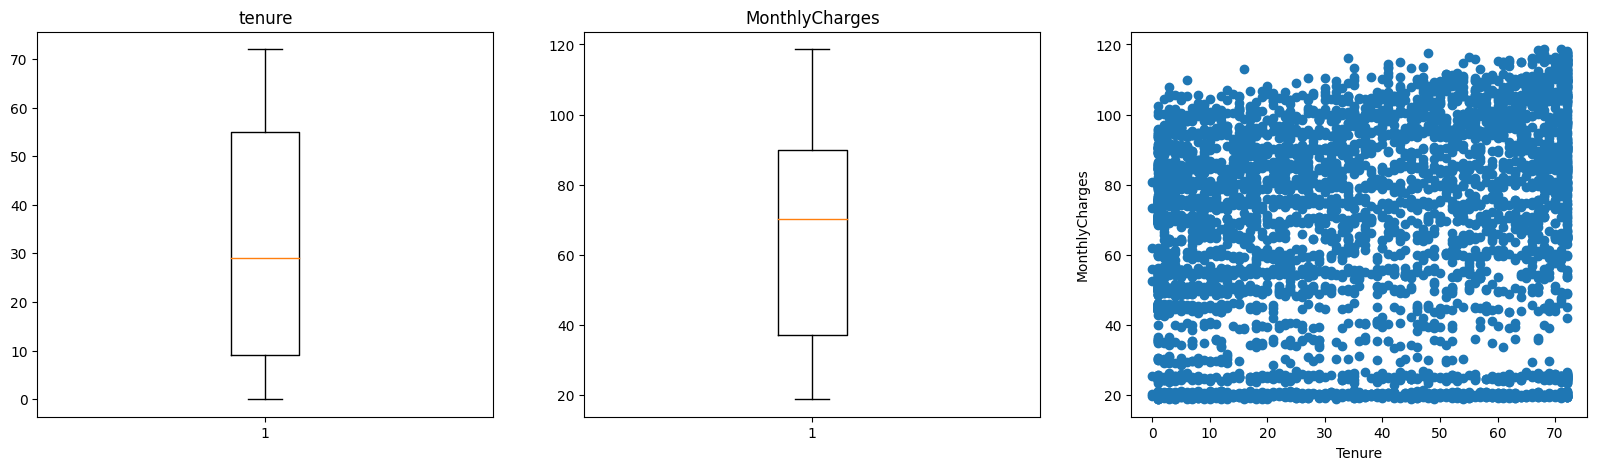

In [125]:
count = 0
plt.figure(figsize=(20,5))
for kolom in numeric:
    count += 1
    plt.subplot(1,3,count)
    plt.boxplot(numeric[kolom])
    plt.title(kolom)
count += 1
plt.subplot(1,3,count)
plt.scatter(numeric['tenure'], numeric['MonthlyCharges'])
plt.xlabel('Tenure')
plt.ylabel('MonthlyCharges')

Dapat dilihat diatas bahwa tidak ada outlier pada tenure maupun Monthly charges apabila dilihat menggunakan IQR. Selain itu tidak ada juga korelasi diantara Monthly Charges dengan Tenure. Untuk lebih memastikan maka saya cek juga multikolinearitas pada kolom numerik. Saya memeriksa multikolinearitas pada kolom numerik saja karena multikolinearitas sangat signifikan pengaruhnya hanya pada variabel numerik. Saya mengecek multikolinearitas dengan vif.

In [126]:
vif_data = pd.DataFrame()
vif_data["Feature"] = numeric.columns
vif_data["VIF"] = [variance_inflation_factor(numeric.values, i)
                        for i in range(len(numeric.columns))]
vif_data

,Feature,VIF
0,tenure,2.605943
1,MonthlyCharges,2.605943


Dapat dilihat bahwa nilai vif masih tergolong kecil sehingga dapat diterima.

## Preprocessing

Untuk data preprocessing, kita akan menggunakan hot encoding untuk kolom Dependents, Paperless Billing, Internet Service, Device Protection, Online Security, Online Backup, dan Tech Support karena kolom kolom ini tidak memiliki vaalue yang berupa urutan (ordinal). Sedangkan untuk kolom contract akan kita pakai ordinal encoding dikarenakan kolom tersebut memiliki urutan dari yang paling singkat waktunya yaitu month to month hinggan paling panjang waktunya yaitu two year. Sisanya untuk kolom yang berupa numerik kita akan lakukan scaling karena kita akan lakukan pemilihan dari berbagai model machine learning dan salah satunya adalah knn yang membutuhkan scaling. Selain itu scaling juga cendrung meningkatkan performa untuk semua model. Pada kali ini saya menggunakan standard scaler karena tidak ada outlier dan juga kita ingin hanya membuat nilai rata rata menjadi nol dengan standard deviasi 1.

In [127]:
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
onehot = OneHotEncoder(drop='first')
ordinal_mapping = [
    {'col':'Contract','mapping': {'Month-to-month': 1, 'One year' : 2,'Two year' : 3}}
]
ordinal_encoder = OrdinalEncoder(mapping = ordinal_mapping)
scaling = StandardScaler()
transformer = ColumnTransformer([
    ('scaling', scaling, ['tenure','MonthlyCharges']),
    ('onehot', onehot, ['Dependents', 'PaperlessBilling','InternetService','OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport']),
    ('ordinal_encoder', ordinal_encoder, ['Contract'])
],remainder='passthrough')

## Data Splitting

Kita akan menggunakan Churn sebagai target dan variabel lainnya sebagai feature. Data tersebut akan kita split 80% untuk data training dan 20% sisanya untung testing. Saya memakai 20% untuk data testing agar cukup banyak data untuk training tetapi tidak kurang juga untuk testing

In [128]:
y = df['Churn']
x = df.drop(columns='Churn')
x_train, x_test, y_train, y_test= train_test_split(
    x,
    y,
    test_size= 0.2,
    stratify= y,
    random_state= 42
)

## Model Selection

Kali ini kita agam mengecek performa dari 8 model yaitu Logistic Regression, K Nearest Neighbor, Decision Tree, Random Forest, Extreme Gradient Boosting, Light Gradient Boosting, Bagging, dan Gradient Boosting. 8 Model ini akan menggunakan default hyperparameter.

In [129]:
lg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier()
lgbm = LGBMClassifier(random_state=42)
bag = BaggingClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

Kali ini saya memakain F1 score dalam mengukur performa model karena dalam kasus ini perusahaan ingin mencegah customer yang memang benar benar akan berhenti berlangganan dan mencegah sebanyak banyaknya customer yang akan berhenti berlangganan. Maka dari itu kita perlu meminimalisir false negative (customer yang aslinya akan berhenti berlangganan tetapi diprediksi akan tetap berlangganan) dan false positive (customer yang aslinya tidak akan berhenti berlangganan tetapi diprediski akan berhenti berlangganan) yang berarti recall dan precision sama sama penting.

Selain itu kita akan ukur performa model dengan cross validation menggunakan split sebanyak 5. Sama seprti data splitting tadi yang berarti 20% untuk validasi dan 80% untuk training.

In [130]:
kfold = StratifiedKFold(n_splits= 5,random_state=42, shuffle=True)
models = [lg,knn,dt,rf,xgb,lgbm,bag,gb]
score_f1 = []
std_f1 = []
for model in models:
    estimator = Pipeline([
        ('Preprocessing', transformer),
        ('model', model)
    ])
    cv_f1 = cross_val_score(estimator,x_train,y_train,cv= kfold,scoring='f1')
    score_f1.append(cv_f1.mean())
    std_f1.append(cv_f1.std())
pd.DataFrame({
    'Model': ['Logistic Regression','K Nearest Neighbor', 'Decision Tree', 'Random Forest', 'Extreme Gradient Boosting', 'Light Gradient Boosting', 'Bagging', 'Gradient Boosting'],
    'Score Mean F1': score_f1,
    'STD F1': std_f1
}).sort_values(by='Score Mean F1', ascending=False)

[LightGBM] [Info] Number of positive: 843, number of negative: 2312
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000722 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 357
[LightGBM] [Info] Number of data points in the train set: 3155, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267195 -> initscore=-1.008901
[LightGBM] [Info] Start training from score -1.008901
[LightGBM] [Info] Number of positive: 842, number of negative: 2313
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004918 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 357
[LightGBM] [Info] Number of data points in the train set: 3155, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.266878 -> initscore=-1.010521
[LightGBM] [

,Model,Score Mean F1,STD F1
7,Gradient Boosting,0.580186,0.031379
0,Logistic Regression,0.574334,0.023210
5,Light Gradient Boosting,0.563705,0.032248
4,Extreme Gradient Boosting,0.547330,0.028815
1,K Nearest Neighbor,0.544493,0.008184
3,Random Forest,0.529444,0.024196
6,Bagging,0.504235,0.027310
2,Decision Tree,0.481649,0.019429


Melihat hasil dari cross validation. Gradient Boosting menempati tempat pertama dengan standar deviasi yang besar dibandingkan kengan standar deviasi dari knn. Tetapi karena terdapat imbalanced classification maka kita coba terlebih dahulu menggunakan undersampling karena kita ingin mengutamakan kelas positif yaitu pelanggan yang churn dan kelas positif ini yang datanya lebih sedikit. Maka dari itu kita menggunakan undersampling agar data dari kelas positif ini tetap dan hanya kelas negatif yang didikurangi. Metode undersampling yang saya gunakan adalah NeighbourhoodCleaningRule. Saya memakai ini untuk menghapus sampel mayoritas yang terlalu dekat dengan kelas minoritas sehingga dapat semakin jelas perbedaan antara kelas mayoritas dan minoritas.

In [131]:
models = [lg,knn,dt,rf,xgb,lgbm,bag,gb]
score_f1 = []
std_f1 = []
for model in models:
    ncr = NeighbourhoodCleaningRule()
    estimator = Pipeline([
        ('Preprocessing', transformer),
        ('undersampling',ncr),
        ('model', model)
    ])
    cv_f1 = cross_val_score(estimator,x_train,y_train,cv= kfold,scoring='f1')
    score_f1.append(cv_f1.mean())
    std_f1.append(cv_f1.std())
pd.DataFrame({
    'Model': ['Logistic Regression','K Nearest Neighbor', 'Decision Tree', 'Random Forest', 'Extreme Gradient Boosting', 'Light Gradient Boosting', 'Bagging', 'Gradient Boosting'],
    'Score Mean F1': score_f1,
    'STD F1': std_f1
}).sort_values(by='Score Mean F1', ascending=False)

[LightGBM] [Info] Number of positive: 843, number of negative: 1471
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000996 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 357
[LightGBM] [Info] Number of data points in the train set: 2314, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.364304 -> initscore=-0.556731
[LightGBM] [Info] Start training from score -0.556731
[LightGBM] [Info] Number of positive: 842, number of negative: 1449
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000152 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 357
[LightGBM] [Info] Number of data points in the train set: 2291, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.367525 -> initscore=-0.542849
[LightGBM] [

,Model,Score Mean F1,STD F1
7,Gradient Boosting,0.622196,0.013833
0,Logistic Regression,0.618225,0.016540
5,Light Gradient Boosting,0.612516,0.012038
3,Random Forest,0.609621,0.012282
4,Extreme Gradient Boosting,0.606513,0.016098
1,K Nearest Neighbor,0.605010,0.013906
6,Bagging,0.603370,0.018335
2,Decision Tree,0.570352,0.015699


Setelah dilihat ternyata dengan undersampling malah meningkatkan performa semua model dan mengurangi nilai standar deviasi mayoritas model. Dapat kita lihat juga performa diatas bahwa Gradient Boosting adalah model yang terbaik dengan rata rata f1 score paling tinggi dan standar deviasi kedua paling kecil yang menandakan model ini dapat menggeneralisasi.

### Scaling

Dikarenakan kita memilih Gradient Boosting maka kita akan ubah preprocesssing kita agar data numerik tidak discaling. Hal ini karena Gradient Boosting merupakan tree based dan tidak sensitif dengan varians. Selain itu scaling mempersulit dalam menginterpretasi model Gradient Boosting.

In [132]:
transformer = ColumnTransformer([
    ('onehot', onehot, ['Dependents', 'PaperlessBilling','InternetService','DeviceProtection', 'OnlineSecurity','OnlineBackup','TechSupport']),
    ('ordinal_encoder', ordinal_encoder, ['Contract'])
],remainder='passthrough')

Setelah itu kita cek performa Gradient Boosting dengan training data dan test data

In [133]:
x_train_cv = transformer.fit_transform(x_train)
x_test_cv = transformer.transform(x_test)
x_train_ncr, y_train_ncr = ncr.fit_resample(x_train_cv,y_train)
gb.fit(x_train_ncr,y_train_ncr)
y_pred_test_default = gb.predict(x_test_cv)
print('Test F1 Score after Tuning Gradient Boosting :',f1_score(y_pred=y_pred_test_default,y_true=y_test))
y_pred_train_default = gb.predict(x_train_ncr)
print('Train F1 Score after Tuning Gradient Boosting :',f1_score(y_pred=y_pred_train_default,y_true=y_train_ncr))

Test F1 Score after Tuning Gradient Boosting : 0.6362252663622526
Train F1 Score after Tuning Gradient Boosting : 0.8583941605839417


Dapat dilihat bahwa performa gradient boosting pada data testing sesuai dengan yang diharapkan karena tidak berbeda jauh hasilnya dengan mean f1 score saat cross validation. Selain itu model ini juga dapat memprediksi positive target dengan cukup baik.

Setelah ini kita akan cek bagaiman performa model melalui recall, precision dan f1 score menggunakan cross validation

In [134]:
def calc_train_error(x_train, y_train, model):
#     '''returns in-sample error for already fit model.'''
    predictions = model.predict(x_train)
    f1 = f1_score(y_train, predictions)
    recall = recall_score(y_train, predictions)
    precision = precision_score(y_train, predictions)
    return {
        'f1' : f1,
        'recall': recall,
        'precision': precision
    }

def calc_validation_error(x_test, y_test, model):
#     '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(x_test)
    f1 = f1_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    return {
        'f1' : f1,
        'recall': recall,
        'precision': precision
    }

def calc_metrics(x_train, y_train, x_test, y_test, model):
#     '''fits model and returns the in-sample error and out-of-sample error'''
    model.fit(x_train, y_train)
    train_error = calc_train_error(x_train, y_train, model)
    validation_error = calc_validation_error(x_test, y_test, model)
    return train_error, validation_error



In [135]:
data = x_train
target = y_train

train_errors_gb = []
validation_errors_gb = []

for train_index, val_index in kfold.split(data, target):

    # split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    Y_train, Y_val = target.iloc[train_index], target.iloc[val_index]

    X_train = transformer.fit_transform(X_train)
    X_val = transformer.transform(X_val)

    X_ncr, Y_ncr = ncr.fit_resample(X_train,Y_train)
    #calculate errors
    train_error_gb, val_error_gb = calc_metrics(X_ncr, Y_ncr, X_val, Y_val, gb)

    # append to appropriate list
    train_errors_gb.append(train_error_gb)
    validation_errors_gb.append(val_error_gb)

In [136]:
listItem = []

for tr,val in zip(train_errors_gb,validation_errors_gb) :
    listItem.append([tr['f1'],val['f1'],tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))
listItem.append(list(np.std(listItem,axis=0)))

gb_score = pd.DataFrame(listItem,
                    columns=['Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

listIndex = list(gb_score.index)
listIndex[-2] = 'Average'
listIndex[-1] = 'STD'
gb_score.index = listIndex
gb_score

,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.857671,0.633466,0.825623,0.757143,0.892308,0.544521
1,0.857666,0.625229,0.833729,0.810427,0.883019,0.508929
2,0.869350,0.629981,0.833729,0.786730,0.908150,0.525316
3,0.868982,0.607350,0.846793,0.744076,0.892365,0.513072
4,0.864571,0.612086,0.848161,0.747619,0.881628,0.518152
Average,0.863648,0.621622,0.837607,0.769199,0.891494,0.521998
STD,0.004714,0.009290,0.007847,0.023271,0.008641,0.011428


Dapat dilihat disini ternyata model sudah cukup baik ketika memprediksi data training dengan nilai yang hampir sama dari recall, precision dan f1 score. Tetapi dapat dilihat bahwa rata rata recall pada data training lebih buruk performanya dibandingkan performa pada precision sehingga antara recall dan precision tidak seimbang dan juga nilai precision yang tidak baik maka f1 score juga masih di angka 0.623936 rata ratanya

Setelah ini kita akan melakukan Hyperparameter Tuning untuk meningkatkan performa model

## Gradien Boosting

### Explanation

Gradient Boosting adalah salah satu model yang merupakan hasil modifikasi dari metode boosting yaitu memperbaiki suatu model
machine learning dengan cara memberikan perhatian lebih terhadap data poin yang hasil klasifikasinya salah.

Berikut cara kerjanya :
1. Hal pertama yang dilakukan gradient boosting adalah menghitung logg odds prediction dengan cara Log odds prediction = ln(banyak target positif/banyak target negatif). Setelah itu akan dihitung predicted probability dengan rumus Predicted probabilty = e<sup>log odds</sup>/(1 + e<sup>log odds</sup>).
2. Langkah kedua adalah residual dengan rumus target yang nilainya 0 atau 1 dikurang predicted probability.
3. Langkah ketiga adalah menggunakan decision tree untuk memprediksi residual yang sudah dicari tadi dan menghitung output dari leaf yang dihasilkan dengan rumus Output of leaf = total residual pada leaf / total dari predicted probability yang dikali dengan 1 - predicted probability.
4. Kita hitung kembali Logg odds prediction dengan rumus log odds prediction = predicted probability sebelumnya yang sudah kita cari + learning rate * output of leaf. Kita cari juga predicted probability yang baru dengan rumus Predicted probability = e<sup>log odds</sup>/(1 + e<sup>log odds</sup>).
5. Setelah itu kita ulangi lagi dari langkah kedua hinggga parameter terpenuhi misalnya banyaknya tree.

Untuk memprediksi berikut cara kerjanya:
1. Pertama kita akan mencari logg odds prediction data yang mau kita prediksi dengan menambahkan logg odds prediction yang pertama kita cari dengan learning rate dikali output of leaf dari decision tree pertama kita buat ditambah learning rate dikali decision tree kedua yanag kita buat ditambah learning rate dikali output of leaf dari decision tree ketika yang kita buat dan seterusnya hingga decision tree terakhir.
2. Setelah itu kita akan mencari predicted probabilitynya dengan rumus Predicted probabilty = e<sup>log odds</sup>/(1 + e<sup>log odds</sup>).
3. Apabila nilai dari log odds tersebut >= threshold maka akan masuk ke kelas positif, apabila logg odds < 0.5 maka masuk ke kelas negatif

### Hyperparameter Tuning

Pada Gradient Boosting terdapat 4 hyperparameter yang akan kita tuning :
1. learning rate = untuk menyusutkan kontribusi untuk setiap tree yang dihasilkan sebanyak learning rate untuk memperlambat learning atau training dari gradient boosting ini.
2. n estimators = untuk menentukan jumlah sequential tree yang digunakan untuk boosting.
3. subsample = untuk menentukan proporsi sampel yang akan digunakan untuk fitting pada decision tree.
4. max depth = untuk mengatur kedalaman maksimal tree.

In [137]:
estimator_gb=Pipeline([
    ('preprocess',transformer),
    ('ncr',ncr),
    ('model',gb)
])
learning_rate = [0.001, 0.01, 0.1]
n_estimators = [10, 100, 1000]
subsample = [0.3, 0.5, 0.7, 1.0]
max_depth = [3, 7, 9]
hyperparam_svc = {
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample' : subsample,
    'model__max_depth' : max_depth
}
tuning_gb = GridSearchCV(
    estimator_gb,
    param_grid= hyperparam_svc,
    cv = kfold,
    scoring='f1',
    n_jobs= -1
)

In [138]:
tuning_gb.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Dependents',
                                                                          'PaperlessBilling',
                                                                          'InternetService',
                                                                          'DeviceProtection',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'TechSupport']),
                                                                        ('ordinal_encoder',
                                                                         Ordina...
                                                                                                  'data_type': dtype('O'),
                                                                                                  'mapping': Month-to-month    1
One year          2
Two year          3
dtype: int64}]),
                                                                         ['Contract'])])),
                                       ('ncr', NeighbourhoodCleaningRule()),
                                       ('model',
                                        GradientBoostingClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.001, 0.01, 0.1],
                         'model__max_depth': [3, 7, 9],
                         'model__n_estimators': [10, 100, 1000],
                         'model__subsample': [0.3, 0.5, 0.7, 1.0]},
             scoring='f1')

Setelah itu kita cek performa hasil tuning dari Gradient Boosting

In [139]:
tuning_result_gb = pd.DataFrame(tuning_gb.cv_results_).sort_values(by='rank_test_score')
tuning_result_gb.iloc[[0],9:]

,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,0.626506,0.647887,0.663951,0.628692,0.625,0.638407,0.015219,1


Dapat dilihat bahwa hasil dari dari cross validatiion setelah tuning lebih baik dari segi mean F1 score dan standar deviasinya. Maka dari itu kita akan cek nilai dari hyperparameter apa saja yang terpilih.

In [140]:
tuning_result_gb.iloc[[0],4:9]

,param_model__learning_rate,param_model__max_depth,param_model__n_estimators,param_model__subsample,params
9,0.001,3,1000,0.5,"{'model__learning_rate': 0.001, 'model__max_de..."


Dapat dilihat diatas bahwa :
- learning rate yang optimal adalah 0.001
- max_depth yang optimal adalah 3
- n_estimator yang optimal adalah 100
- subsample yang optimal adalah 0.5

Setelah itu kita terapkan hyperparameter tersebut pada model gradient boosting kita dan kita cek performanya pada data training dan data testing kita.

In [141]:
tuned_gb = GradientBoostingClassifier(random_state=42,learning_rate=0.001,max_depth=3,n_estimators=1000,subsample=0.5)
x_train_pre = transformer.fit_transform(x_train)
x_test_pre = transformer.transform(x_test)
x_train_ncr, y_train_ncr = ncr.fit_resample(x_train_pre,y_train)
tuned_gb.fit(x_train_ncr,y_train_ncr)
y_pred_test_tuning_gb = tuned_gb.predict(x_test_pre)
print('Test F1 Score after Tuning Gradient Boosting :',f1_score(y_pred=y_pred_test_tuning_gb,y_true=y_test))
y_pred_train_tuning_gb = tuned_gb.predict(x_train_ncr)
print('Train F1 Score after Tuning Gradient Boosting :',f1_score(y_pred=y_pred_train_tuning_gb,y_true=y_train_ncr))

Test F1 Score after Tuning Gradient Boosting : 0.632952691680261
Train F1 Score after Tuning Gradient Boosting : 0.798974358974359


Dapat kita lihat bahwa untuk data testing dan data training kita, performa model ini menurun dari 0.64 menjadi 0.63 untuk data testing dan 0.85 menjadi 0.79 pada data training, tetapi karena hasil dari cross validation untuk gradient boosting yang sudah di tuning lebih bagus yang berarti dapat lebih menggeneralisir maka kita akan memilih gradient boosting setelah tuning.

Setelah itu, kita buat pipeline untuk gradient boosting setelah tuning untuk kita simpan modelnya dengan pickle

In [142]:
estimator_gb_tuned = Pipeline([
    ('preprocess',transformer),
    ('ncr',ncr),
    ('model',tuned_gb)
])
with open('gb_model.pkl','wb') as file:
    pickle.dump(estimator_gb_tuned,file)

# Interpretasi dari hasil model

### Feature Importance

Kita lihat feature importance dari gradient boosting yang sudah di hyperparameter tuning.

In [147]:
feature_importance = tuned_gb.feature_importances_
imp_table = pd.DataFrame({
    'importance' : feature_importance
}, index= transformer.get_feature_names_out())
imp_table = imp_table.sort_values(by='importance')
px.bar(imp_table,orientation='h',width=1000, height=800)

Dapat kita lihat bahwa yang mempengaruhi signifikan model ini dalam memprediksi adalah kolom contract, tenure, monthly charges, dan apakah customer menggunakan Fiber Optic sebagai internet service.

### Partial Dependence Plot

Setelah itu kita lihat pengaruh dari fitur dengan Partial Dependence Plot

In [148]:
interpret = pd.DataFrame(data=x_train_ncr)
interpret.columns = transformer.get_feature_names_out()

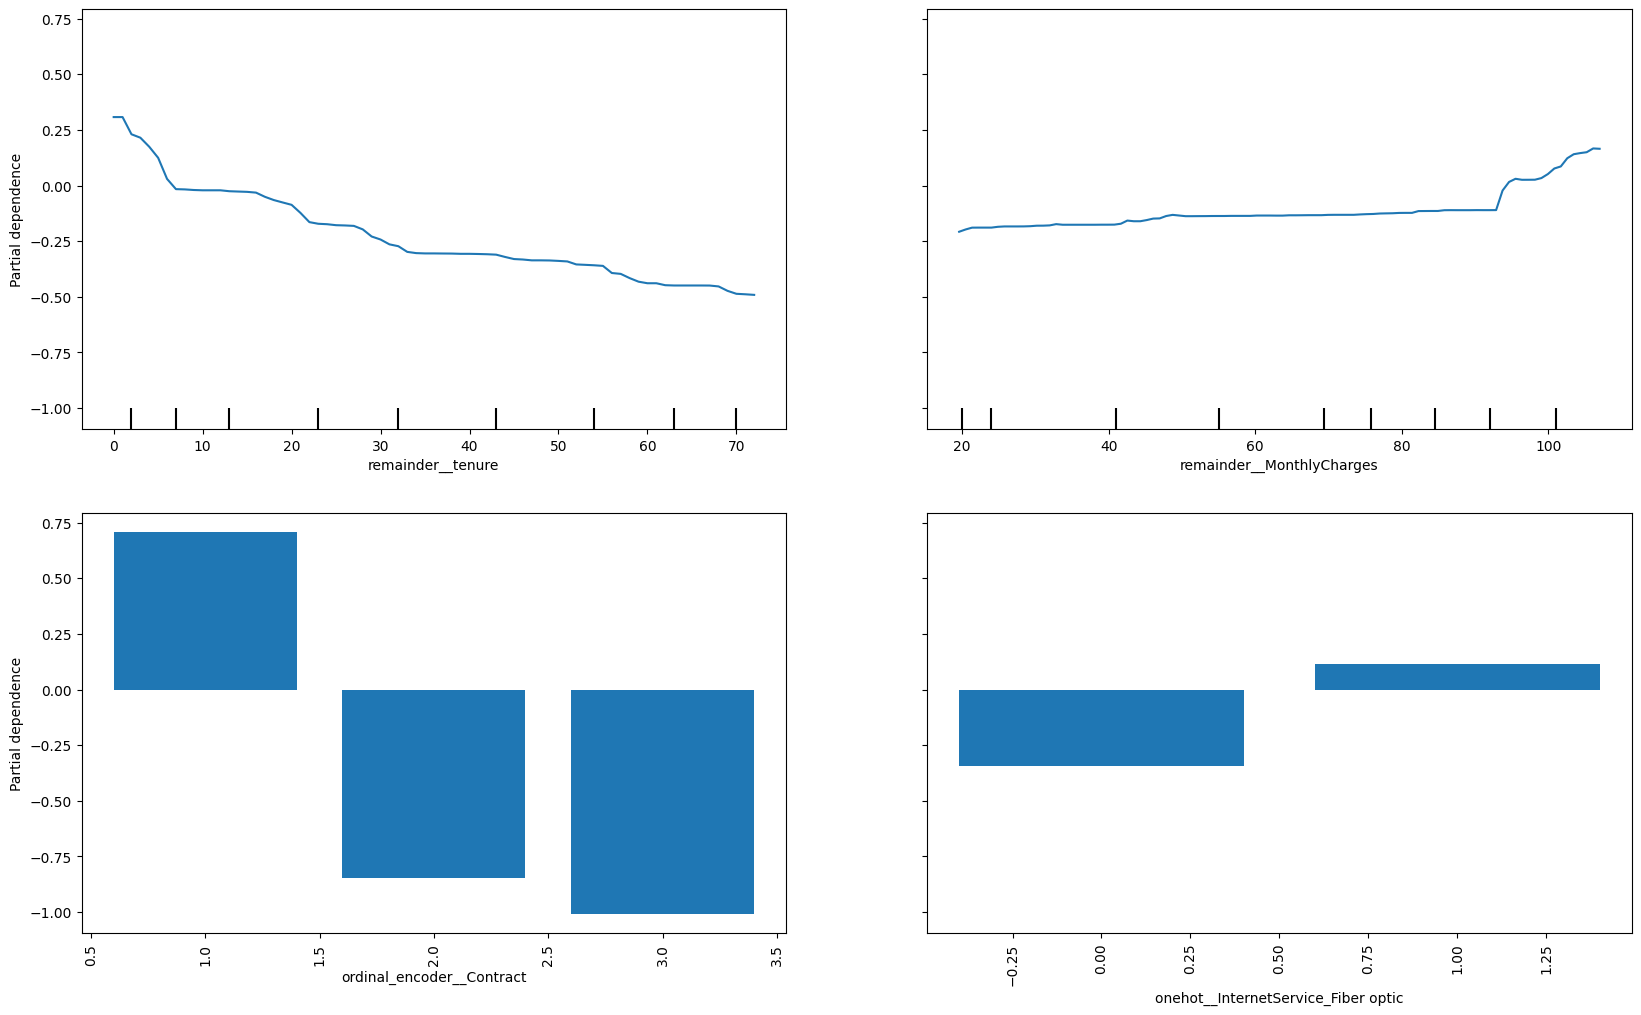

In [149]:
fig, ax = plt.subplots(2,2,figsize=(20, 12))
PartialDependenceDisplay.from_estimator(tuned_gb,interpret,['remainder__tenure','remainder__MonthlyCharges','ordinal_encoder__Contract','onehot__InternetService_Fiber optic'],categorical_features=['onehot__InternetService_Fiber optic', 'ordinal_encoder__Contract'],random_state=42, ax = ax)

Dapat dilihat dari grafik diatas bahwa:
- Semakin lama customer sudah berlangganan dengan perusahaan maka semakin kecil kemungkinan model akan memprediksi bahwa customer tersebut akan berhenti berlangganan. Dapat dilihat masa paling krusial adalah dari 0 bulan sampai sekitar bulan ke 7 terjad penurunan signifakan kemungkinan customer untuk diprediksi akan tidak berlangganan lagi.
- Semakin besar harga per bulan yang perlu dibayar customer maka semakin besar kemungkinan model akan memprediksi bahwa customer tersebut akan berhenti berlangganan. Dapa dilihat bahwa angka paling krusialnya adalah dari angka 90 - 95 terjadi kenaikan yang tajam dalam kemungkinan model memprediksi bahwa customer akan churn.
- Ternyata customer dengan kontrak perbulan membuat kemungkinan semakin besar bahwa model akan memprediksi customer tersebut akan berhenti berlangganan dan sebaliknya apabila kontraknya berupa per tahun maupun per 2 tahun.
- Ternyata customer yang menggunakan internet service dan berupa fiber optic memperbesar kemungkinan model memilih customer tersebut akan berhenti berlangganan. Sedangkan untuk customer yang tidak menggunakan internet service maupun yang menggunakan tapi berupa DSL akan memperkecil kemungkinan model dalam memprediksi customer tersebut akan berhenti berlangganan.

# Limitasi

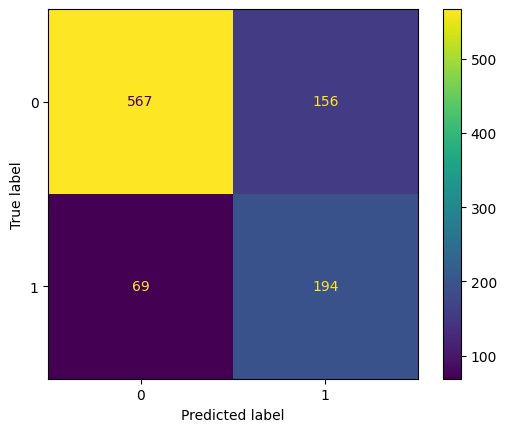

In [150]:
ConfusionMatrixDisplay.from_estimator(estimator_gb_tuned,x_test,y_test)

In [151]:
tp = 194
fp = 156
tn = 567
fn = 69
total = tp + fp + tn + fn
persentase_tp = tp / total * 100
persentase_fp = fp / total * 100
persentase_tn = tn / total * 100
persentase_fn = fn / total * 100
persentase_tidak_churn = (fp + tn) / total * 100
persentase_churn = (tp + fn) / total * 100
print('Persentase customer yang sebenarnya churn :', round(persentase_churn,2),'%')
print('Persentase customer yang sebenarnya tidak churn :', round(persentase_tidak_churn,2),'%')
print('Persentase customer yang sebenarnya churn diprediksi churn :', round(persentase_tp,2),'%')
print('Persentase customer yang sebenarnya churn diprediksi tidak churn :', round(persentase_fn,2),'%')
print('Persentase customer yang sebenarnya tidak churn diprediksi churn :', round(persentase_fp,2),'%')
print('Persentase customer yang sebenarnya tidak churn diprediksi tidak churn :', round(persentase_tn,2),'%')

Persentase customer yang sebenarnya churn : 26.67 %
Persentase customer yang sebenarnya tidak churn : 73.33 %
Persentase customer yang sebenarnya churn diprediksi churn : 19.68 %
Persentase customer yang sebenarnya churn diprediksi tidak churn : 7.0 %
Persentase customer yang sebenarnya tidak churn diprediksi churn : 15.82 %
Persentase customer yang sebenarnya tidak churn diprediksi tidak churn : 57.51 %


Dari data diatas dapat dismpulkan sebagai berikut:
- Customer yang churn adalah 26.26 % dari total semua customer dan customer yang tidak churn adalah 73.3 % dari total semua customer
- Dari keseluruhan customer, prediksi yang benar untuk churn sebanyak 16.98 % dari total semua customer dan untuk yang tidak churn sebanyak 57.51 % dari total semua customer
- Kesalahan dari model ini dalam memprediksi yang seharusnya churn sebanyak 7 % dari total semua customer dan kesalahan dalam memprediksi yang seharusnya tidak churn adalah sebanyak 15.82 % dari total semua customer

# Rekomendasi

Berikut rekomendasi untuk mengembangkan model menjadi lebih baik lagi:
- Memperbanyak data customer yang digunakan untuk training.
- Memenambah fitur baru di dalam data yang memungkinkan untuk meningkatkan performa model seperti umur customer.
- Tuning model dengan hyperparameter yang lebih banyak.
- Mencoba menggunakan model lain seperti SVM.

Strategi yang dapat diimplementasikan untuk mencegah churn:
- Dapat dipertimbangkan untuk memberikan penyesuaian harga untuk monthly charges lebih besar dari 90, bisa dengan memberikan diskon kepada customer yang diprediksi berhenti berlangganan dan monthly chargesnya lebih besar dari 90
- Dapat dipertimbangkan juga untuk lebih memperhatikan customer baru yaitu dengan tenure 0 - 7 bulan dan yang memiliki kontrak per bulan. Bisa dengan memberikan customer potongan biaya khusus untuk mereka apabila melanjutkan berlangganan bagi yang terprediksi akan churn dengan kriteria tadi.
- Dapat dipertimabangkan juga untuk memberikan promo apabila customer berlangganan dengan kontrak per tahun atau per 2 tahun. Bisa dengan memberikan potongan diskon 10 % misalnya apabila langsung berlangganan satu tahun atau dua tahun.

# Kesimpulan

Apabila diasumsikan sebagai berikut:
1.  Mata uang yang digunakan adalah USD
1.  Kita sumsikan pendekatan marketing untuk mencegah customer yang churn membutuhkan biaya sebesar 10 % dari monthly charge yang dibayarkan setiap customer
1.  Akibat dari kehilangan customer adalah kerugian sebanyak monthly charge yang dibayarkan
1.  Kita asumsikan pencegahan customer yang churn berhasil sehingga yang tadinya mau berhenti berlangganan, jadi tetap lanjut berlangganan.
1.  Kita asumsikan apabila dengan cara tradisional (tanpa prediksi dari model) semuanya diberikan pendekatan marketing.
1.  Seluruh pendapatan perusahaan sebulan adalah penjumlahan semua monthly charges.

Kita dapat memnghitung estimasi pengurangan pendapatan apabila menggunakan cara tradisional dan dengan model yang kita bangun.

Maka dari itu kita perlu membuat terlebih dahulu data gabungan x_test dengan y_test dan y_pred_test_tuning_gb

In [152]:
x_train_with_pred_and_true = pd.concat([x_test.reset_index(),pd.DataFrame(data = y_pred_test_tuning_gb),pd.DataFrame(data = y_test).reset_index()], axis=1)
x_train_with_pred_and_true.head()

,index,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,0,index,Churn
0,4659,No,45,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,87.25,1,4659,1
1,3272,No,10,Yes,No,Fiber optic,No,No,Month-to-month,Yes,78.15,1,3272,0
2,898,No,44,Yes,Yes,DSL,Yes,No,One year,Yes,61.50,0,898,0
3,1084,No,4,No,No,DSL,No,No,Month-to-month,No,55.50,1,1084,0
4,4599,Yes,61,No internet service,No internet service,No,No internet service,No internet service,Two year,Yes,25.00,0,4599,0


Setelah membuat data gabungan x_test dengan y_test dan y_pred_test_tuning_gb, kita estimasikan biaya cara tradisional dan biaya menggunakan model.

In [153]:
biaya_tradisional =  x_train['MonthlyCharges'].sum() * 10 / 100
print('Biaya cara tradisional:', biaya_tradisional)
akibat_diskon_model = x_train_with_pred_and_true[x_train_with_pred_and_true[0] == 1]['MonthlyCharges'].sum() * 10 / 100
print('Dampak pemberian diskon pada customer yang diprediksi akan churn:',akibat_diskon_model)
kerugian_kehilangan_customer = x_train_with_pred_and_true[(x_train_with_pred_and_true[0] == 0) & (x_train_with_pred_and_true['Churn'] == 1)]['MonthlyCharges'].sum()
print('Dampak kehilangan customer:',kerugian_kehilangan_customer)
biaya_menggunakan_model = kerugian_kehilangan_customer + kerugian_kehilangan_customer
print('Biaya menggunakan model:',biaya_menggunakan_model)
print('Selisih biaya cara tradisional dengan biaya menggunakan model:', round(biaya_tradisional - biaya_menggunakan_model,2))
seluruh_pendapatan = x_train['MonthlyCharges'].sum()
print('Persentase biaya cara tradisional dari seluruh pendapatan:', round(biaya_tradisional / seluruh_pendapatan * 100,2), '%')
print('Persentase biaya cara tradisional dari seluruh pendapatan:', round(biaya_menggunakan_model / seluruh_pendapatan * 100,2), '%')

Biaya cara tradisional: 25548.61
Dampak pemberian diskon pada customer yang diprediksi akan churn: 2643.745
Dampak kehilangan customer: 4661.4
Biaya menggunakan model: 9322.8
Selisih biaya cara tradisional dengan biaya menggunakan model: 16225.81
Persentase biaya cara tradisional dari seluruh pendapatan: 10.0 %
Persentase biaya cara tradisional dari seluruh pendapatan: 3.65 %


Keterangan =
- biaya tradisional = pengurangan pendapatan perusahaan akibat memberikan diskon 10 % ke semua customer
- dampak pemberian diskon pada customer yang diprediksi akan churn = pengurangan pendapatan perusahaan akibat memberikan diskon kepada customer yang diprediksi akan churn
- dampak kehilangan customer = pengurangan pendapata perusahaan akibat kehilangan customer
- biaya menggunakan model = dampak pemberian diskon pada customer yang diprediksi akan churn + dampak kehilangan customer
- selisih biaya cara tradisional dengan biaya menggunakan model = biaya tradisional - biaya menggunakan model
- seluruh pendapatan = jumlah monthly charge semua customer pada x_train
- persentase Biaya cara tradisional dari seluruh pendapatan = biaya tradisional / seluruh pendapatan
- persentase Biaya cara tradisional dari seluruh pendapatan = biaya menggunakan model / seluruh pendapatan

Kesimpulan =
- Dari data diatas dapat dilihat bahwa dengan menggunakan cara tradisional akan membuat perusahaan kehilangan 10 % dari seluruh pendapatannya yaitu sebesar 25548.61 USD
- Dengan menggunakan model maka perusahaan akan kehilangan 3.65 % dari seluruh pendapatannya yaitu sebesar 9322.8 USD
- Menggunakan cara tradisional akan membuat perusahaan kehilangan pendapatan sebesar 10/3.65 = 2.74 kali dibandingkan dengan menggunakan model

Maka dari itu jauh lebih menguntungkan bagi perusahaan untuk menggunakan model gradient boosting yang sudah kita tuning tadi dalam memutuskan siapa saja yang akan diterapkan strategi dalam mencegah customer berhenti berlangganan.